## Time Series Analysis


In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

pl.style.use('ggplot')

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
subway = np.load('MTA_Fare.npy')
print subway.shape

#Replacing all -1 with NANs for ease of understanding
subway = subway.astype(float)
subway[subway == -1] = np.nan

(600, 23, 194)


In [3]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])


# Task 1

Rows : Subway station <br>
Columns : variables (swipe type) <br>
Height : Time

In [4]:
subway[0,0,0]

56961.0

In [5]:
weeks = pd.date_range('05/21/2010', periods = 194, freq = 'W')
stations = np.nansum(subway, axis = 1)


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/lib/nanfunctions.py:489: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


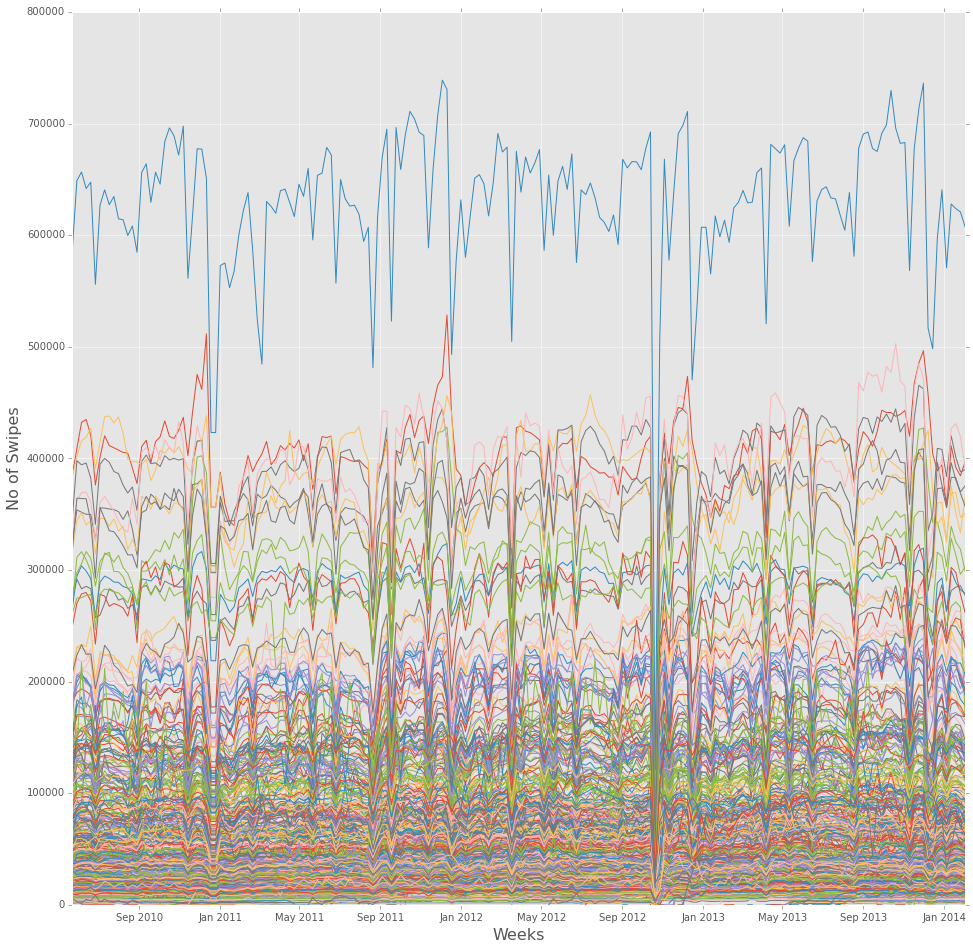

In [6]:
pl.figure(figsize = (16,16))
pl.plot(weeks, np.transpose(stations));
pl.ylabel('No of Swipes', fontsize = 16);
pl.xlabel('Weeks', fontsize = 16);

Visually, we can see a major event late 2012. <br>
However we can aggregate the data for all stations for a clearer picture

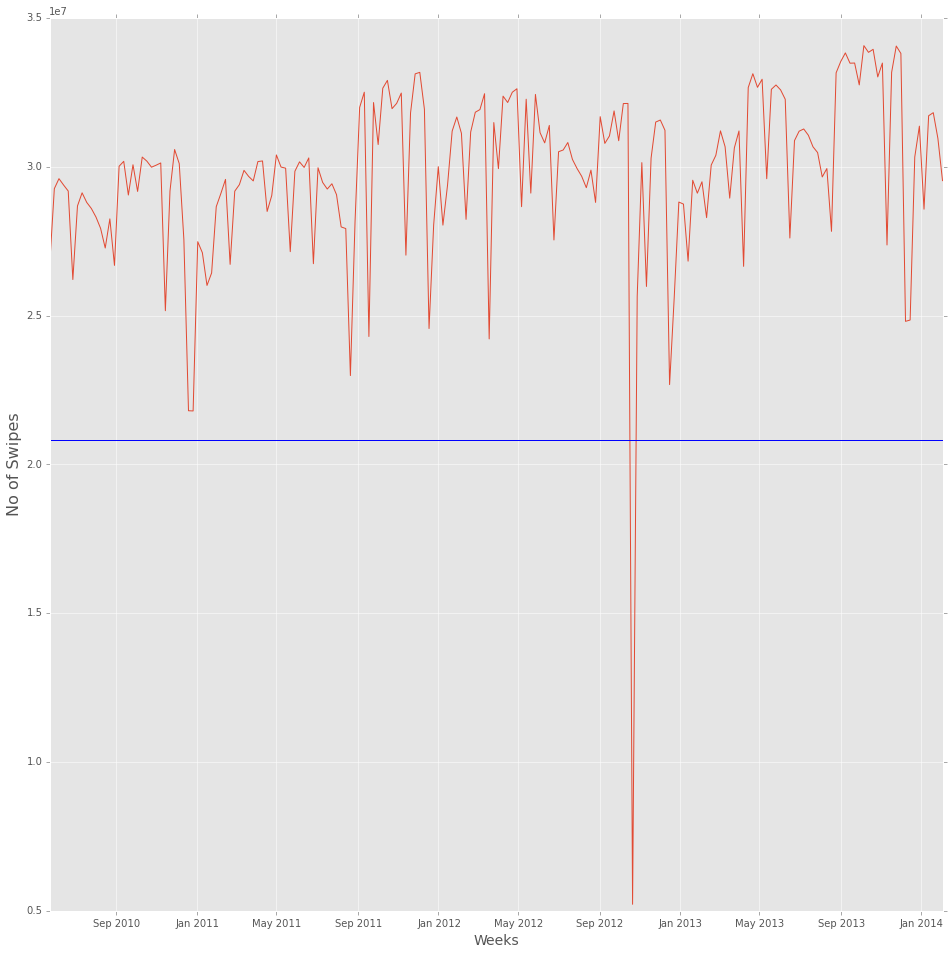

In [10]:

weekly_swipes = np.nansum(stations, axis = 0)
mean = np.nanmean(weekly_swipes)
std = np.nanstd(weekly_swipes)

pl.figure(figsize = (16,16))
pl.plot(weeks, np.transpose(weekly_swipes));
pl.axhline(mean-3*std)
pl.ylabel('No of Swipes', fontsize = 16);
pl.xlabel('Weeks', fontsize = 14);

In [11]:
#Detecting the event by standard deviation and mean


print np.where(weekly_swipes < (mean - 3*std))


(array([126]),)


### Detected Event
The event occurd 127 weeks after 05/21/2010
This is around the last week of October in 2012, which coincides with when Hurricane Sandy hit NY (October 29th)

# Task 2

In [12]:
ridership_types = np.nansum(subway, axis = 0)
ridership_types.shape

(23, 194)

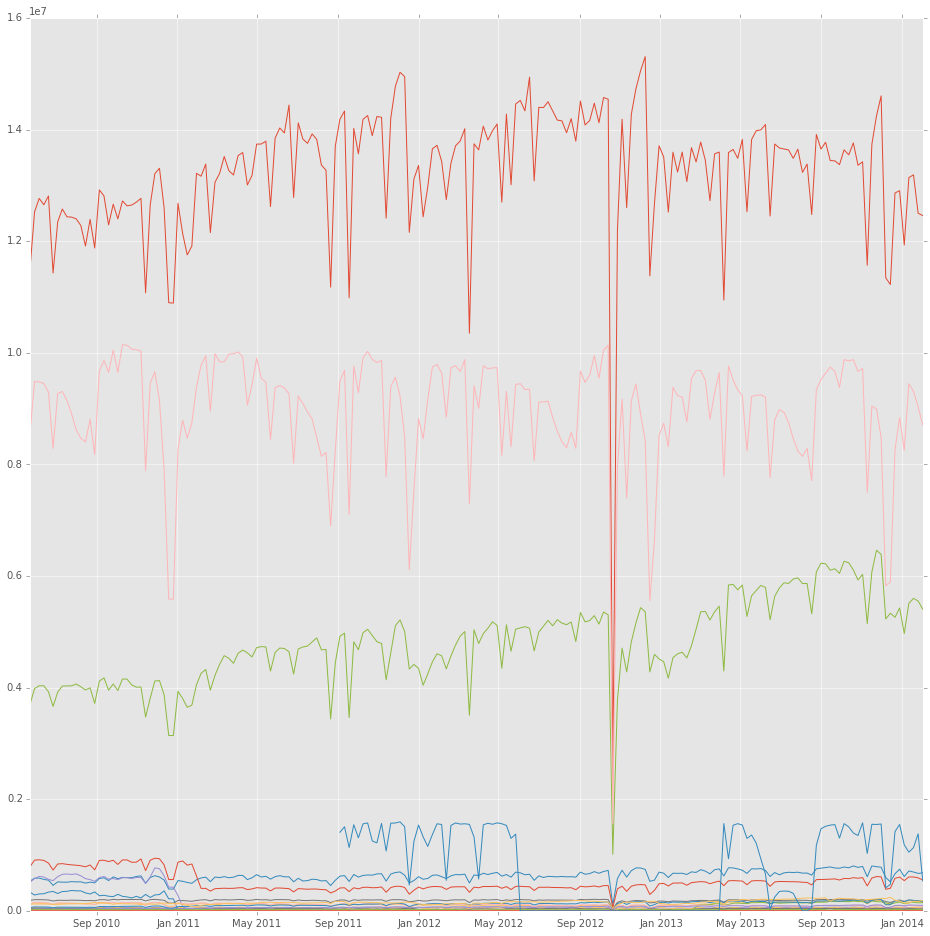

In [13]:
pl.figure(figsize = (16, 16))
pl.plot(weeks, np.transpose(ridership_types));

To find if a ridership type is stationary, we can comute a rolling mean and stand deviatian

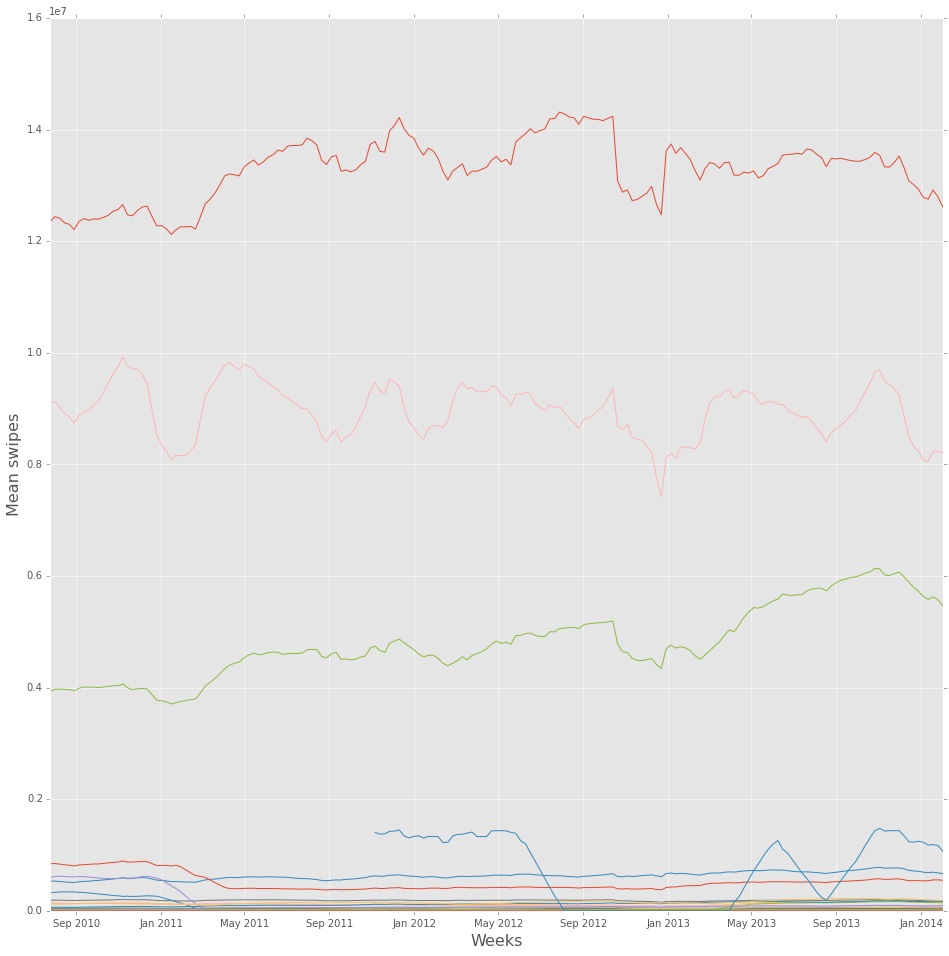

In [14]:
smooth_ridership_types = pd.rolling_mean(np.transpose(ridership_types), 10)
pl.figure(figsize = (16,16))
pl.plot(weeks, smooth_ridership_types);
pl.ylabel('Mean swipes', fontsize = 16);
pl.xlabel('Weeks', fontsize = 16);

It is evident that the scale of the graph the trends of the types not used as frequently and fo plotting for all types may be suitable

In [15]:
smooth_ridership_types.shape

(194, 23)

/Library/Python/2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/Library/Python/2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


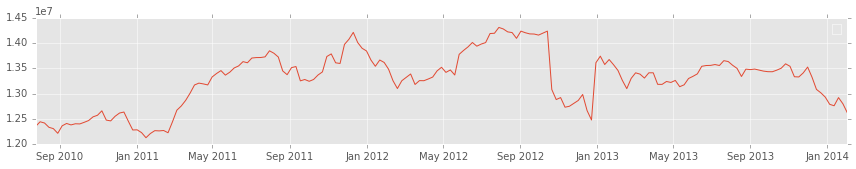

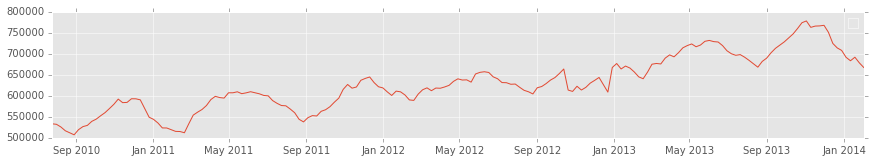

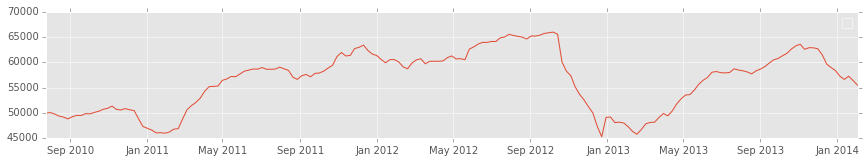

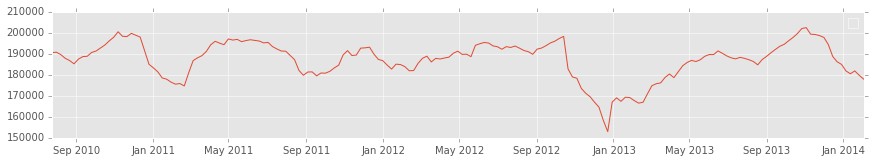

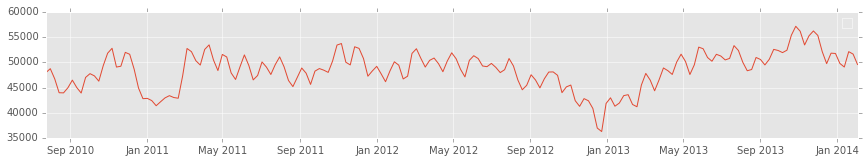

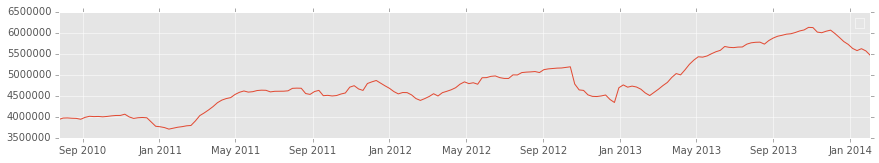

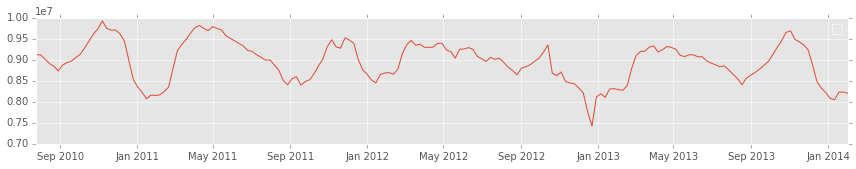

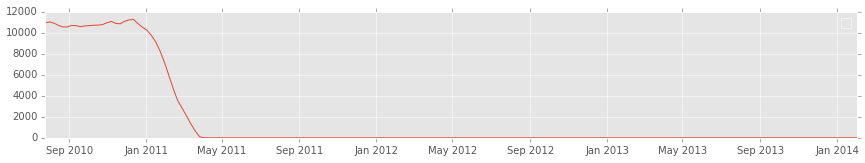

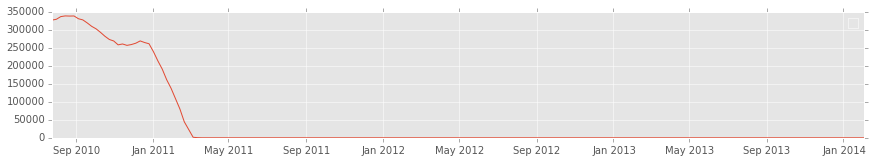

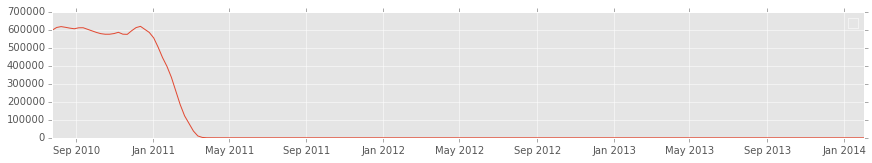

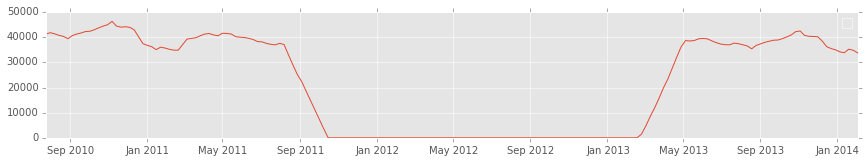

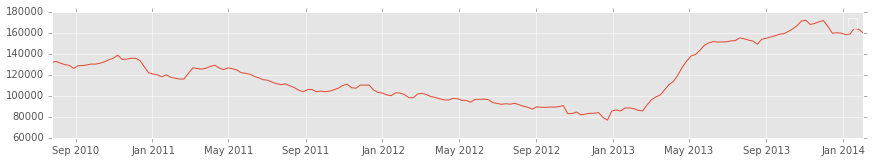

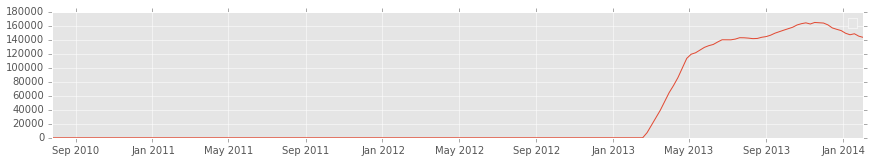

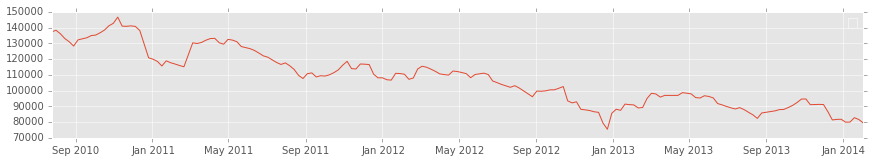

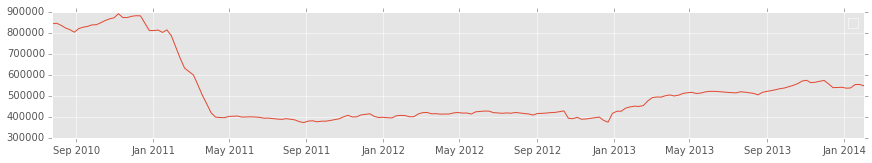

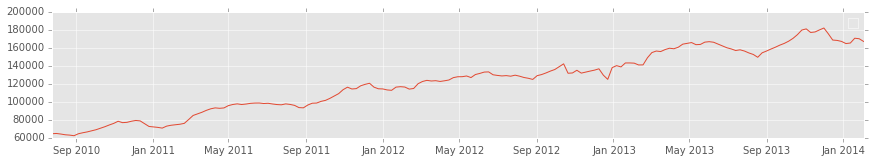

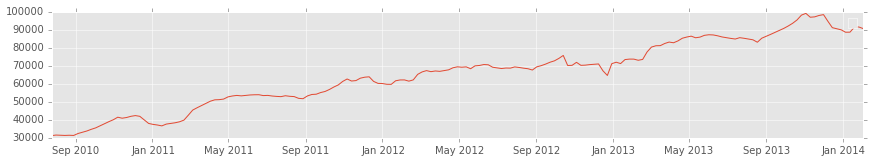

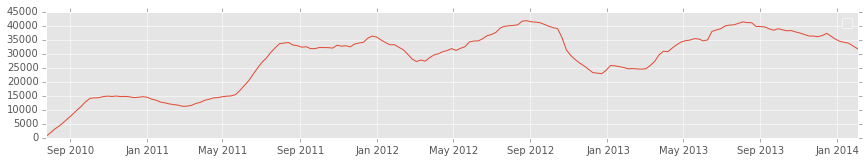

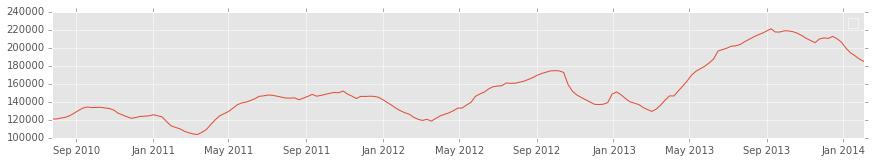

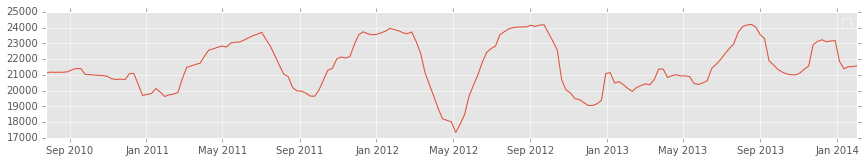

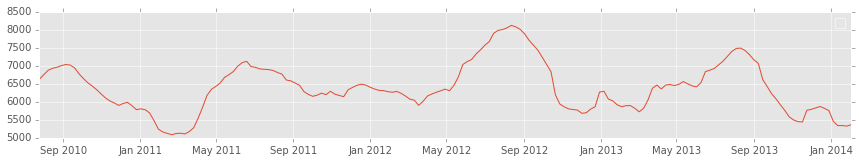

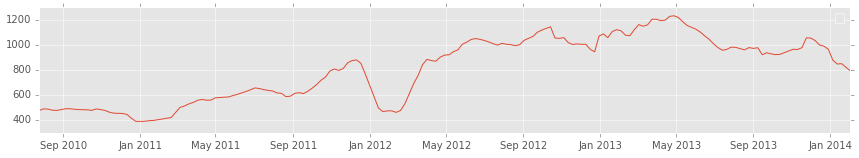

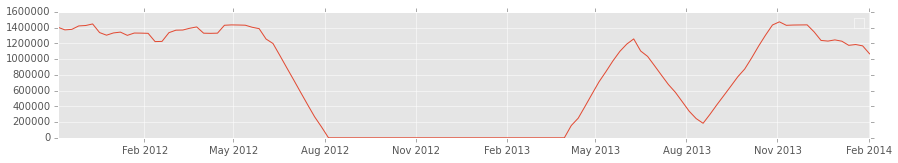

In [16]:
for i in arange(23):
    pl.figure(figsize = (32,32))
    pl.subplot(12,2,i)
    pl.legend(ridetype[i])
    ax = pl.plot(weeks, smooth_ridership_types[:, i])
    


# Task 3

The task is to find the stations that show the most annual periodicity

In [17]:
f = np.abs(np.fft.fft(stations))

